# ECH 60 Spring 2022: HW 5

Rename this file as lastname_firstname and upload to canvas before 5pm Friday, May 27th.
<font color='red'> Total 4 points</font>. Partial points will be awarded ONLY IF a reasonable attempt has been made.

**PROBLEM 1:** Velocity of a fluid flowing within a pipe of circular cross-section as measured at a radial location $r$ from the center is given as 

$$\begin{matrix} 
{\rm r~({\rm cm})} & 0.0 & 0.25 & 0.5  & 0.75 & 1.0 & 1.25 & 1.5 & 1.75 & 2.0 \\
{\rm u~({\rm cm/s)}} & 3.8 & 3.76 & 3.62 & 3.36 & 2.97 & 2.45 & 1.78& 0.96 & 0.0\\
        \end{matrix}$$
        
The flow rate (with units of cubic centimters per second in this case) is given by the area integral of the velocity across the circular cross section of the pipe (of radius $R$): 

$$Q=\int_A u(r)\, dA$$

Numerically integrate and find the flow rate.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
r=np.arange(0,2.1,.25)
u=np.array([3.8,3.76,3.62,3.36,2.97,2.45,1.78,.96,0])
z=u*r
flow_rate=si.simps(z,2*np.pi*r)
print("Flow rate is %.2f" %flow_rate)

Flow rate is 24.98


**PROBLEM 2:** Solve the following differential equation using the Heun method, the RK4 method, and using `odeint`:

$$(1+t^2)e^{y^2/2}\frac{dy}{dt}+\cos(t)=0$$

with initial condition $y(t=0)=1$ for $t$ from $0$ to $10$. Use time steps of $0.5$. Plot all three results on the same graph with a legend.

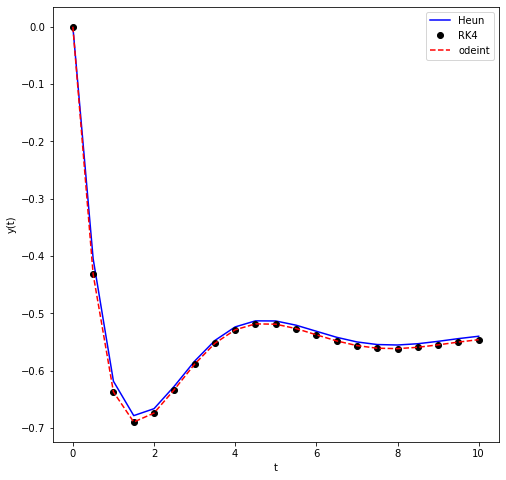

In [8]:
def f(y,t): return -np.cos(t)/((1+t**2)*np.exp(y**2/2))

h=0.5
t=np.arange(0,10+h,h)
y=np.zeros(t.shape)
y[0]=0
for i in range(len(t)-1):
    k1=f(y[i],t[i])
    k2=f(y[i]+h*k1,t[i]+h)
    k=(k1+k2)/2
    y[i+1]=y[i]+h*k
plt.figure(figsize=(8,8))
plt.plot(t,y,'b-',label='Heun')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

h=0.5
t=np.arange(0,10+h,h)
y=np.zeros(t.shape)
y[0]=0
for i in range(len(t)-1):
    k1=f(y[i],t[i])
    k2=f(y[i]+h*k1/2,t[i]+h/2)
    k3=f(y[i]+h*k2/2,t[i]+h/2)
    k4=f(y[i]+h*k3,t[i]+h)
    k=(k1+2*k2+2*k3+k4)/6
    y[i+1]=y[i]+h*k
plt.plot(t,y,'ko',label='RK4')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

y0=0
h=0.5
t=np.arange(0,10+h,h)
y = si.odeint(f,y0,t)
plt.plot(t,y,'r--',label='odeint')
plt.legend()
plt.show()


*Rough work/test cells (won't be graded):*